## ============ SVMs (MultiClass Image Classification) ==============

#### SVM Read Link: https://www.cse.iitd.ac.in/~parags/teaching/2023/col774/supp_material/svm.pdf

#### Intel Image Classification Dataset
#### Classes: Class 0 (City), Class 1 (Forest), Class 2 (Ice Mountains), Class 3 (Mountains), Class 4 (Ocean), Class 5 (Streets)

### [Using Sklearn MLP]
##### Doc Link: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### HyperParameters

In [1]:
#####################################    CLASS DEFN    #####################
#classes               = [0,1]
#classes               = [2,3]
#classes               = [0,1,2]
classes               = [0,1,2,3,4,5]
num_classes           = len(classes)
max_num_classes       = 6

#####################################    HYPERPARAMETERS    #####################
resize_dim            = 16
use_normalization     = 1

#####################################    ACCURACY DATA    #######################
# BINARY: [0,1] 
# resize_dim = 16                  accuracy (train, valid):   0.99  0.88
# resize_dim = 32                  accuracy (train, valid):   0.99  0.84

# MULTICLASS: [0,1, 2] 
# resize_dim = 16                  accuracy (train, valid):   0.99  0.84
# resize_dim = 32                  accuracy (train, valid):   0.94  0.75

# MULTICLASS: [0,1, 2, 3, 4, 5] 
# resize_dim = 16                  accuracy (train, valid):   0.86  0.62
# resize_dim = 32                  accuracy (train, valid):   0.86  0.56


flatten_dim       = resize_dim*resize_dim*3

### Testing Data Before and After Resizing

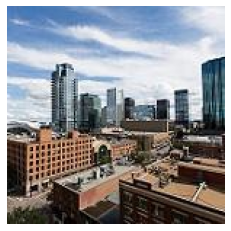

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('dataset_image/train/0/10006.jpg')
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(img)

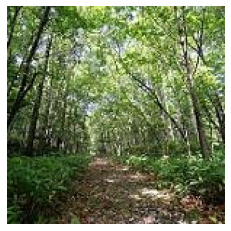

In [3]:
img=mpimg.imread('dataset_image/train/1/10010.jpg')
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(img)

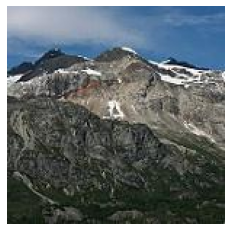

In [4]:
img=mpimg.imread('dataset_image/train/2/100.jpg')
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(img)

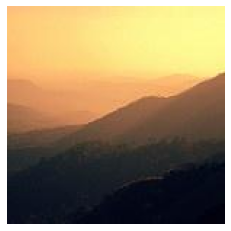

In [5]:
img=mpimg.imread('dataset_image/train/3/10000.jpg')
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(img)

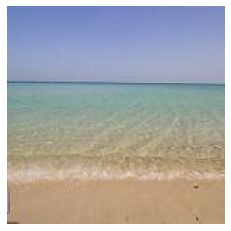

In [6]:
img=mpimg.imread('dataset_image/train/4/10016.jpg')
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(img)

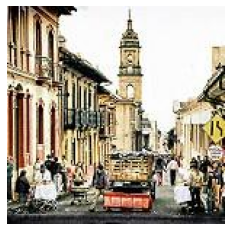

In [7]:
img=mpimg.imread('dataset_image/train/5/10070.jpg')
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(img)

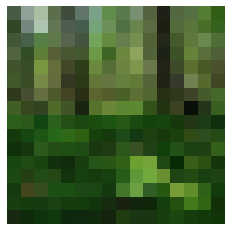

In [8]:
from PIL import Image
img = Image.open("dataset_image/train/1/14621.jpg")
resized_img = img.resize((resize_dim, resize_dim), Image.Resampling.LANCZOS)    # take average of rgb in neighborhood
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(resized_img)

### Flatten and Unflatten Array

In [9]:
import numpy as np                
np_array = np.asarray(resized_img, dtype="int32")
#print (np_array)
flat_array = np_array.flatten()
#print (flat_array)

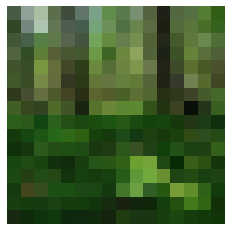

In [10]:
unflat_array = np.reshape(np.uint32(flat_array), (resize_dim, resize_dim, 3))
plt.axis('off')  # Turn off the axis
imgplot = plt.imshow(unflat_array)

### Loading and Normalizing Training Data: (Classes: 0 to 5)

In [11]:
import os

def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    resized_img = img.resize((resize_dim, resize_dim), Image.Resampling.LANCZOS)    # take average of rgb in neighborhood
    np_array    = np.asarray(resized_img, dtype="int32")
    flat_array  = np_array.flatten()
    flat_array  = np.reshape(flat_array, (1, len(flat_array)))
    return flat_array

num_train_samples = [0,0,0,0,0,0]       # ith entry stores the number of train sample in class i
num_valid_samples = [0,0,0,0,0,0]       # ith entry stores the number of valid sample in class i
index_train_class = [0,0,0,0,0,0]       # ith entry stores the starting index of class i in train np array 
index_valid_class = [0,0,0,0,0,0]       # ith entry stores the starting index of class i in valid np array
index = 0
x_train     = np.empty([0, resize_dim*resize_dim*3], dtype="int32")
for label in classes:
    index_train_class[label] = index
    dir_path_name = "dataset_image/train/" + str(label) + "/"
    for filename in os.listdir(dir_path_name):
        if filename.endswith(".jpg"): 
            #print (filename)
            filepath   = os.path.join(dir_path_name, filename)
            newrow     = load_image(filepath)
            x_train    = np.vstack([x_train, newrow])
            num_train_samples[label] += 1
            index += 1

index = 0
x_valid = np.empty([0, resize_dim*resize_dim*3], dtype="int32")
for label in classes:
    index_valid_class[label] = index
    dir_path_name = "dataset_image/val/" + str(label) + "/"
    for filename in os.listdir(dir_path_name):
        if filename.endswith(".jpg"): 
            #print (filename)
            filepath   = os.path.join(dir_path_name, filename)
            newrow     = load_image(filepath)
            x_valid    = np.vstack([x_valid, newrow])
            num_valid_samples[label] += 1
            index += 1

In [12]:
print ("number of training   samples: ", len(x_train))
print ("number of validation samples: ", len(x_valid))
#print (x_train_1[1])

number of training   samples:  14280
number of validation samples:  1200


In [13]:
if use_normalization == 1:
    x_train = x_train/255
    x_valid = x_valid/255
#print (x_train_1[1])

### MLP Classifier Train 

In [14]:
y_train = []
for label in classes:
    y_train  +=   [label]*num_train_samples[label]
y_train = np.array(y_train)

In [15]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

# number of iter = 300 (epochs), relu, adam, learning rate = 0.001, batch size = 'auto', last activation: softmax, 
# hidden layer = [100], alpha = 0.0001
# setting random state ensures reproducibility

/Users/dishantgoyal/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Train and Validation Prediction

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_train_true = []
for label in classes:
    y_train_true  +=   [label]*num_train_samples[label]

y_train_pred  = clf.predict(x_train)
print("PR Report         : \n", classification_report(y_train_true, y_train_pred, labels=classes, zero_division=0))
print("Confusion Matrix  : \n", confusion_matrix(y_train_true, y_train_pred))
print("\nTraining Accuracy        : ", accuracy_score(y_train_true, y_train_pred), "\n")

y_valid_true = []
for label in classes:
    y_valid_true  +=   [label]*num_valid_samples[label]

y_valid_pred  = clf.predict(x_valid)
print("PR Report         : \n", classification_report(y_valid_true, y_valid_pred, labels=classes, zero_division=0))
print("Confusion Matrix  : \n", confusion_matrix(y_valid_true, y_valid_pred))
print("\nValidation Accuracy        : ", accuracy_score(y_valid_true, y_valid_pred), "\n")

PR Report         : 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      2380
           1       0.97      0.96      0.96      2380
           2       0.84      0.82      0.83      2380
           3       0.81      0.79      0.80      2380
           4       0.71      0.87      0.78      2380
           5       0.94      0.94      0.94      2380

    accuracy                           0.86     14280
   macro avg       0.87      0.86      0.86     14280
weighted avg       0.87      0.86      0.86     14280

Confusion Matrix  : 
 [[1930   42   55   80  180   93]
 [  16 2279   10   15   31   29]
 [   7    1 1944  185  235    8]
 [  13    8  148 1880  325    6]
 [  17   12  135  147 2059   10]
 [  31   13   30   14   54 2238]]

Training Accuracy        :  0.8634453781512605 

PR Report         : 
               precision    recall  f1-score   support

           0       0.59      0.47      0.52       200
           1       0.81      0.77